# Ex1

Смоделировать выборку объема 1000 из дискретного распределения на множестве цифр 0, 1, 2, ..., 9 с весами 0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2. По выборке построить гистограмму. Оптимизируйте алгоритм, упорядочив веса. Сравните время генерации выборки с неупорядоченными и упорядоченными весами.

Time =  0.03200221061706543


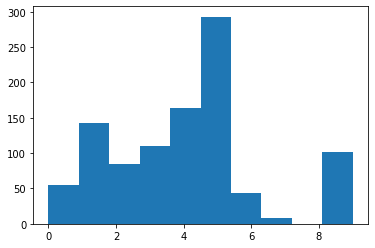

In [68]:
import numpy as np 
import time
start = time.time()
rand = np.random.random(1000)
weight = np.array([0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2])
weight/=weight.sum()
axis = [weight[:i].sum() for i in range(1,11)]
l = np.arange(10)
num = []
for i in range(1000):
    a = np.array([rand[i] < axis])
    num.append(l[a[0] == True][0])
import matplotlib.pyplot as plt 
end = time.time()
print('Time = ', end-start)
plt.hist(num) 
plt.show()


Time =  0.024001598358154297


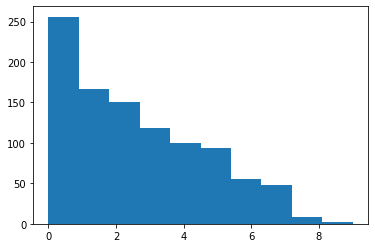

In [74]:
start = time.time()
rand = np.random.random(1000)
weight = np.array([0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2])
weight/=weight.sum()
weight = np.sort(weight)[::-1]
axis = [weight[:i].sum() for i in range(1,11)]
l = np.arange(10)
num = []
for i in range(1000):
    a = np.array([rand[i] < axis])
    num.append(l[a[0] == True][0])
end = time.time()
print('Time = ', end-start)
plt.hist(num) 
plt.show()

# Ex2

Смделируйте выборку размера 1000 из распределения  Exp(λ) . Постройте выборочную гистограмму и точный график плотности распределения.

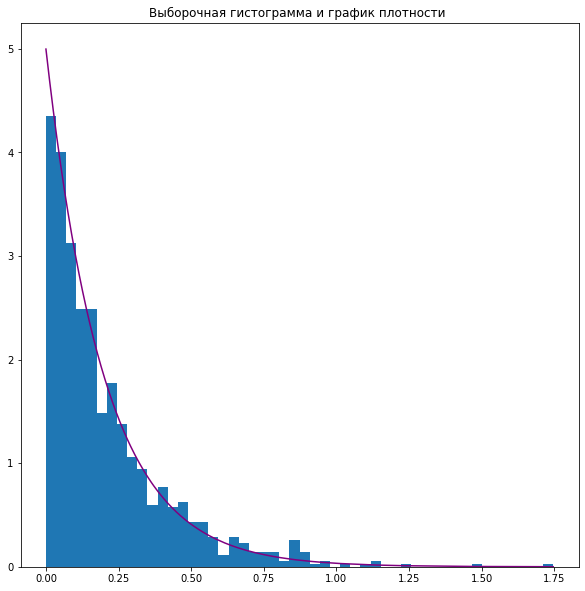

In [101]:
from math import exp, log
a = 5
plt.figure(figsize=(10,10))
rand = np.random.random(1000)
rand.sort()
x = [-1/a*log(1 - rand[i]) for i in range(1000)]
plt.hist(x, density = True, bins = 50)
p = [a*exp(-a*x[i]) for i in range(1000)]
plt.plot(x, p, color = 'purple')
plt.title("Выборочная гистограмма и график плотности ")
plt.show()

# Ex3

Обоснуйте, что метод accept-reject действительно производит выборку из нужного распределения. Смоделируйте 1000 точек из усеченного распределения Коши, приведенного ниже, используя генератор равномерного распределения. Нарисуйте график полученной выборочной гистограммы и сравните его с графиком точной функции плотности.

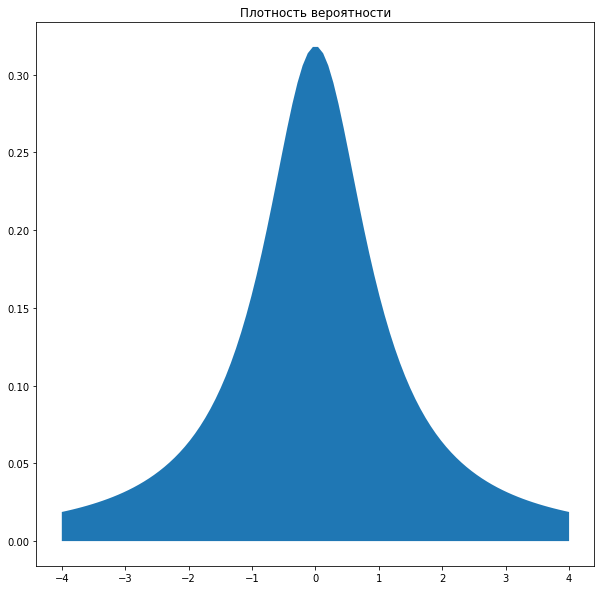

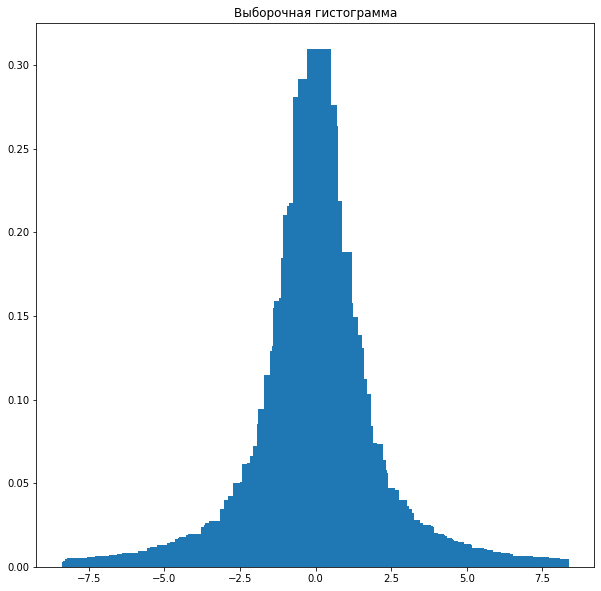

In [108]:
from scipy import stats
dist = stats.cauchy()
x = np.linspace(-4, 4, 100)
plt.figure(figsize = ((10,10)))
plt.fill_between(x, 0, dist.pdf(x))
plt.title("Плотность вероятности")
plt.show()

from math import pi
rand = [16*np.random.rand()-8 for i in range(1000)]
rand.sort()
cauch = []
k=0
while k!=1000:
    t = 1/pi*np.random.rand()
    if t < 1/(pi*(1+rand[k]*rand[k])):
        cauch.append(t)
        k+=1
plt.figure(figsize = ((10,10)))
plt.title("Выборочная гистограмма")
plt.bar(rand, cauch)
plt.show()


# Ex 4

Смоделировать выборку из 500 точек равномерно распределенных внутри данного треугольника без использования метода отбора.

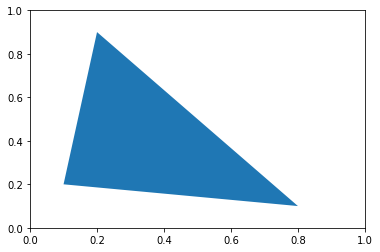

In [109]:
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

polygon = Polygon(0.1 * np.array([[1, 2], [2, 9], [8, 1]]), True)
plt.gca().add_collection(PatchCollection([polygon]))
plt.show()

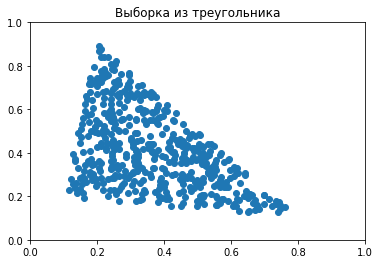

In [120]:
import math
x = np.random.rand(500)
y = np.random.rand(500)
for i in range(500):
    if y[i]>-x[i]+1:
        x[i]=-x[i]+1
        y[i]=-y[i]+1        
x*=math.hypot(0.7, 0.1)
y*=math.hypot(0.7, 0.1)
tg = math.atan2(-1, 7)
xnew = x
x = x*math.cos(tg)-y*math.sin(tg)+0.1
y = xnew*math.sin(tg)+y*math.cos(tg)+0.2
plt.scatter(x, y)
plt.xlim(left=0)
plt.xlim(right=1)
plt.ylim(bottom=0)
plt.ylim(top=1)
plt.title("Выборка из треугольника")
plt.show()

# Ex5

Смоделировать выборку из 500 точек внутри данного круга без использования метода отбора.